In [19]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
flowers = load_iris()
dir(flowers)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [21]:
flowers.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
df = pd.DataFrame(flowers.data, columns=flowers.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
flower_df = df.drop(df[["sepal length (cm)", "sepal width (cm)"]], axis="columns")
flower_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [24]:
from sklearn.cluster import KMeans

In [25]:
km = KMeans(n_clusters=3)
flower_df["cluter"] = km.fit_predict(flower_df)

In [26]:
flower_df

,petal length (cm),petal width (cm),cluter
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [27]:
%matplotlib inline

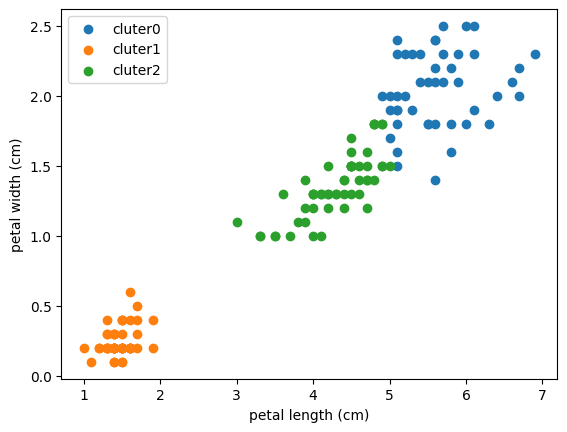

In [28]:
x = 1
for i in range(3):
    df = flower_df[flower_df["cluter"]==i]
    plt.scatter(df["petal length (cm)"], df["petal width (cm)"], label =f"cluter {i}")
    
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()
plt.show()
    

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
scaler.fit(flower_df[["petal length (cm)"]])
flower_df["petal length (cm)"] = scaler.transform(flower_df[["petal length (cm)"]])

scaler.fit(flower_df[["petal width (cm)"]])
flower_df["petal width (cm)"] = scaler.transform(flower_df[["petal width (cm)"]])

flower_df.drop(flower_df[["cluter"]], axis="columns", inplace=True)
flower_df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [13]:
km = KMeans(n_clusters=3)
flower_df["cluster"] = km.fit_predict(flower_df)

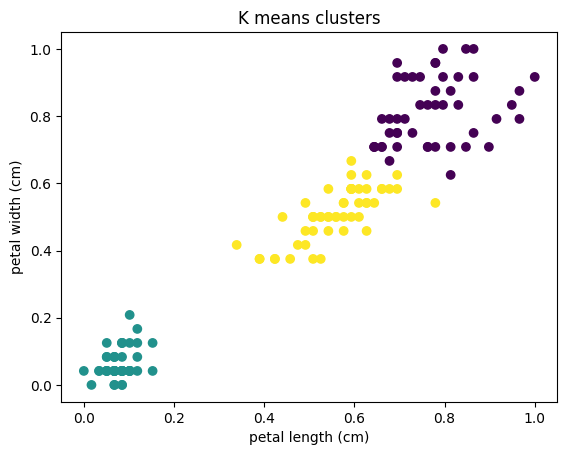

In [14]:
plt.scatter(flower_df["petal length (cm)"], flower_df["petal width (cm)"], c=flower_df["cluster"], cmap='viridis')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('K means clusters')
plt.show()

[]

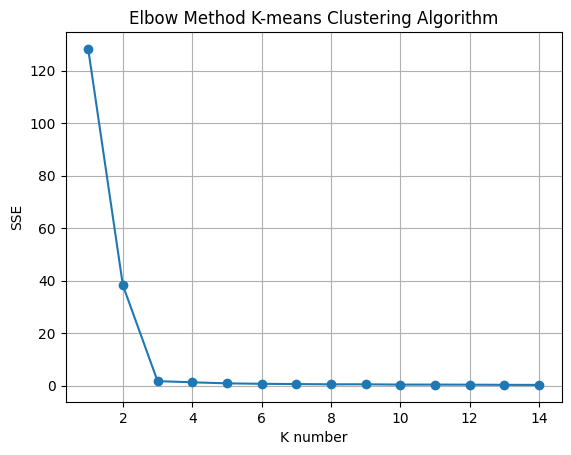

In [17]:
sse = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit_predict(flower_df)
    sse.append(km.inertia_)
plt.plot(range(1,15), sse, marker= "o")
plt.xlabel("K number")
plt.ylabel("SSE")
plt.title("Elbow Method K-means Clustering Algorithm")
plt.grid()
plt.plot()